In [1]:
from lib import *

/Users/cmaloney111/Documents/CalPoly/EE428/Xtractofuse/LightGlue/lightglue/lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [2]:
init_light_glue()

Using cpu


In [3]:
DATASET_PATH = Path('data/long-hallway')

In [4]:
validate_dataset(DATASET_PATH)

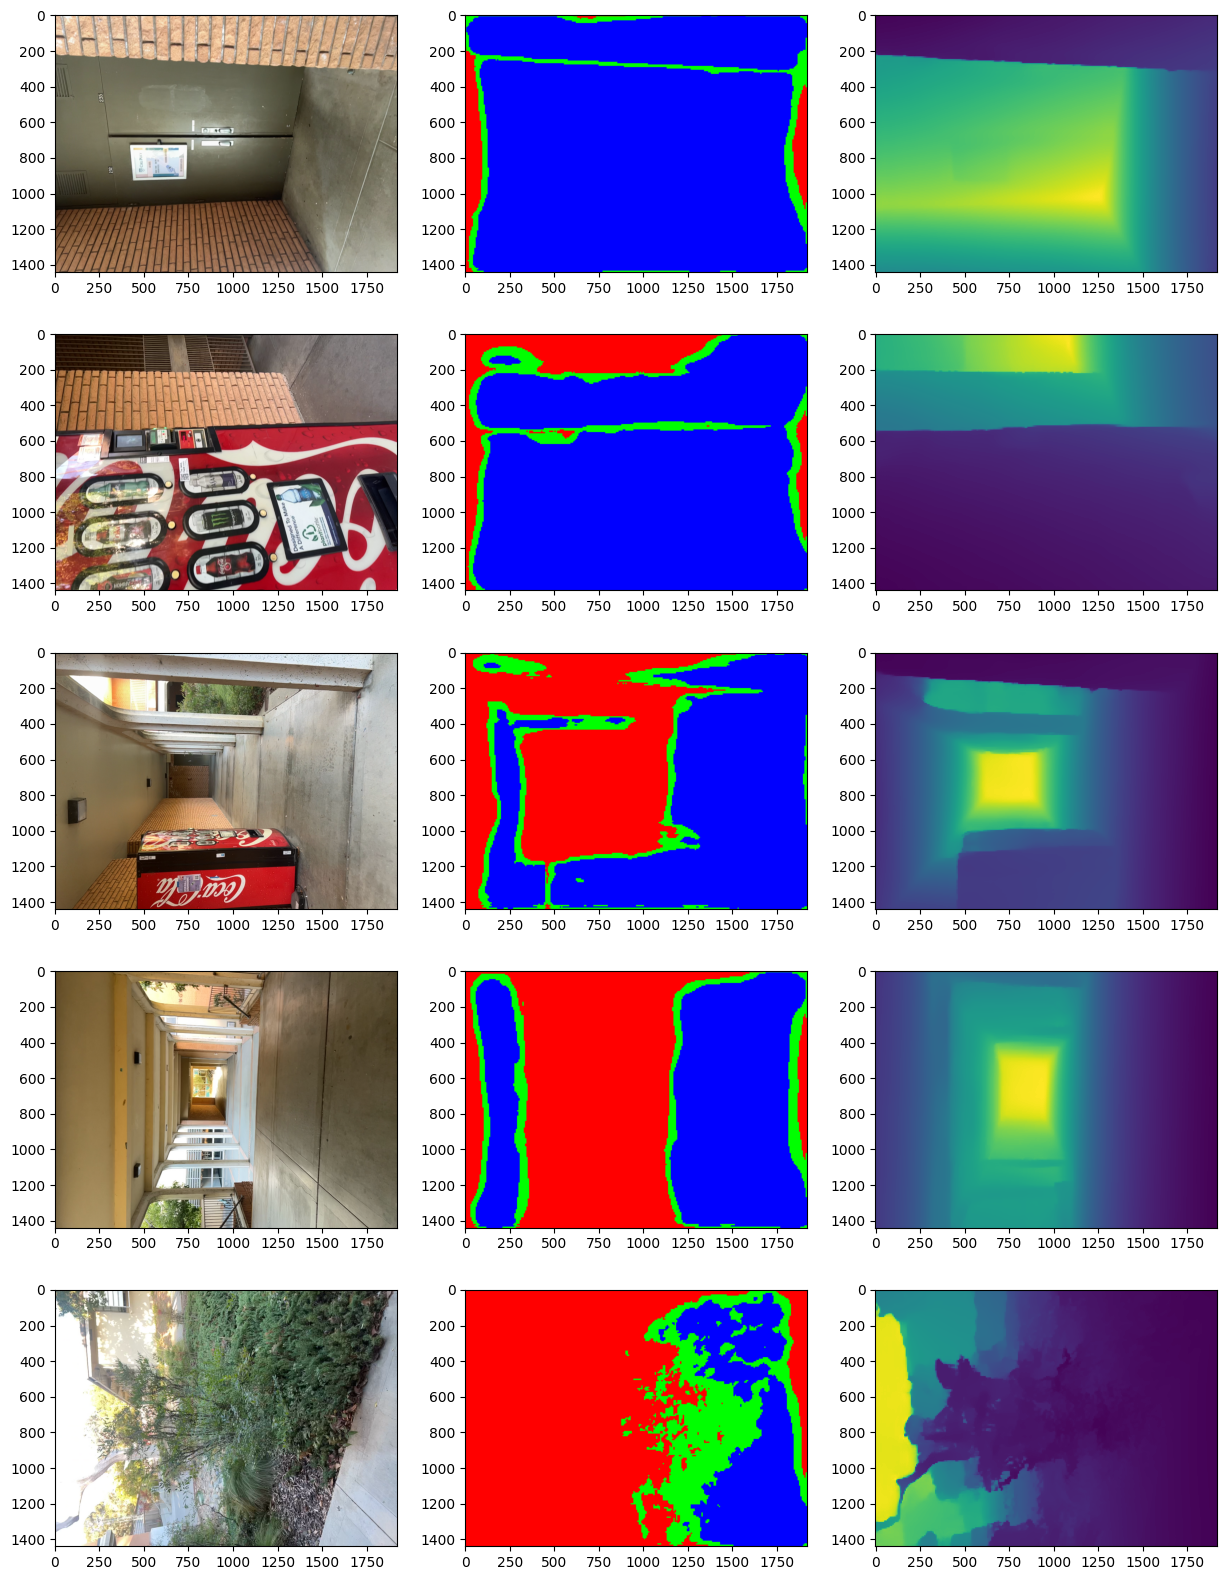

In [5]:
show_random_sample(DATASET_PATH)

In [ ]:
EVERY = 1
MAX_NUM_FRAMES = 20

# With ICP
exp_point_cloud, rgb, control_point_cloud, metrics = video_to_point_cloud(DATASET_PATH, ransac_matching_threshold=100.0, every=EVERY, max_frames=MAX_NUM_FRAMES)

Processing Frame #1 (for free, since we define it as the origin)
Initial RMSE: 0.00, Initial MAE: 0.00, Initial Chamfer: 0.00, Initial Hausdorff: 0.00, Initial Precision: 1.00, Initial Recall: 1.00
Processing frame #0002... Data Load Done (0.11s) - Point Cloud Done (0.04s) - RANSAC Done (2.91s) - ICP Done (2.45s) - Control Done (0.04s) - Accumulation Non GC: 1495933
GC: 1495933
Done (0.10s) - Metrics RMSE: 24.07, MAE: 21.56, Chamfer: 15.68, Hausdorff: 54.66, Precision: 0.42, Recall: 0.42
Done (15.31s) --- Frame finished in 20.97s
Processing frame #0003... Data Load Done (0.11s) - Point Cloud Done (0.04s) - RANSAC Done (2.86s) - ICP Done (1.28s) - Control Done (0.05s) - Accumulation Non GC: 1463454
GC: 1463454
Done (0.11s) - Metrics RMSE: 46.56, MAE: 42.08, Chamfer: 30.44, Hausdorff: 100.94, Precision: 0.23, Recall: 0.23
Done (21.54s) --- Frame finished in 25.99s
Processing frame #0004... Data Load Done (0.11s) - Point Cloud Done (0.04s) - RANSAC Done (2.88s) - ICP Done (1.57s) - Contro

In [ ]:
EVERY = 3
MAX_NUM_FRAMES = 10

# With ICP
exp_point_cloud, rgb, control_point_cloud, metrics = video_to_point_cloud(DATASET_PATH, ransac_matching_threshold=100.0, every=EVERY, max_frames=MAX_NUM_FRAMES)

In [ ]:
# Without ICP
exp_point_cloud_noicp, rgb_noicp, _, metrics_noicp = video_to_point_cloud(DATASET_PATH, ransac_matching_threshold=100.0, every=EVERY, max_frames=MAX_NUM_FRAMES, use_icp=False)

Processing Frame #1 (for free, since we define it as the origin)
Processing frame #0002... Data Load Done (0.11s) - Point Cloud Done (0.04s) - RANSAC Done (3.02s) - Control Done (0.05s) - Accumulation Done (0.09s) - RSME: 67.55 Done (0.06s) --- Frame finished in 3.38s
Processing frame #0012... Data Load Done (0.22s) - Point Cloud Done (0.04s) - RANSAC Done (3.03s) - Control Done (0.05s) - Accumulation Done (0.08s) - RSME: 239.50 Done (0.06s) --- Frame finished in 3.48s
Processing frame #0022... Data Load Done (0.13s) - Point Cloud Done (0.04s) - RANSAC Done (3.07s) - Control Done (0.06s) - Accumulation Done (0.08s) - RSME: 475.12 Done (0.06s) --- Frame finished in 3.44s
Processing frame #0032... Data Load Done (0.14s) - Point Cloud Done (0.04s) - RANSAC Done (3.07s) - Control Done (0.05s) - Accumulation Done (0.08s) - RSME: 431.51 Done (0.05s) --- Frame finished in 3.43s
Processing frame #0042... Data Load Done (0.13s) - Point Cloud Done (0.04s) - RANSAC Done (3.11s) - Control Done (0.

Text(0.5, 1.0, 'RMSE between ground truth and experimental point clouds')

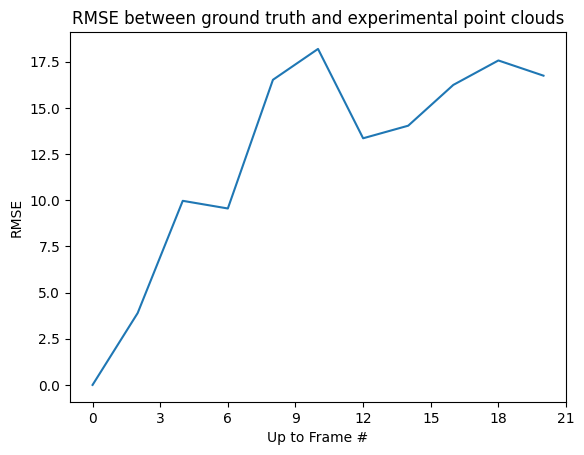

In [7]:
# Graph out rmse_history
fig = plt.figure()
ax = fig.add_subplot()

total_frames_in_dataset = get_total_frames(DATASET_PATH)

# Calculate the frame ids given that we always add frame 0 (as origin)
# we skip EVERY frames and we only want NUM_FRAMES
x = np.concatenate(([0], np.arange(2, total_frames_in_dataset, EVERY)))[0:len(metrics['rmse'])]

ax.plot(x, metrics['rmse'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Up to Frame #")
ax.set_ylabel("RMSE")
ax.set_title("RMSE between ground truth and experimental point clouds")

Text(0.5, 1.0, 'RSME between ground truth and experimental point clouds')

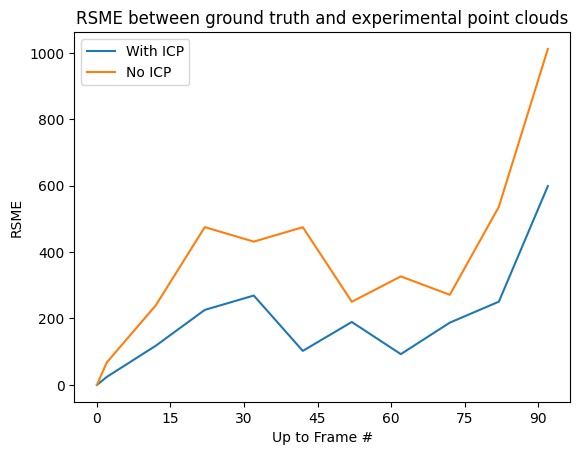

In [ ]:
fig, ax = plt.subplots(1)

ax.plot(x, metrics['rmse'], label='With ICP')
ax.plot(x, metrics_noicp['rmse'], label='No ICP')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Up to Frame #")
ax.set_ylabel("RSME")
ax.legend()
ax.set_title("RSME between ground truth and experimental point clouds")

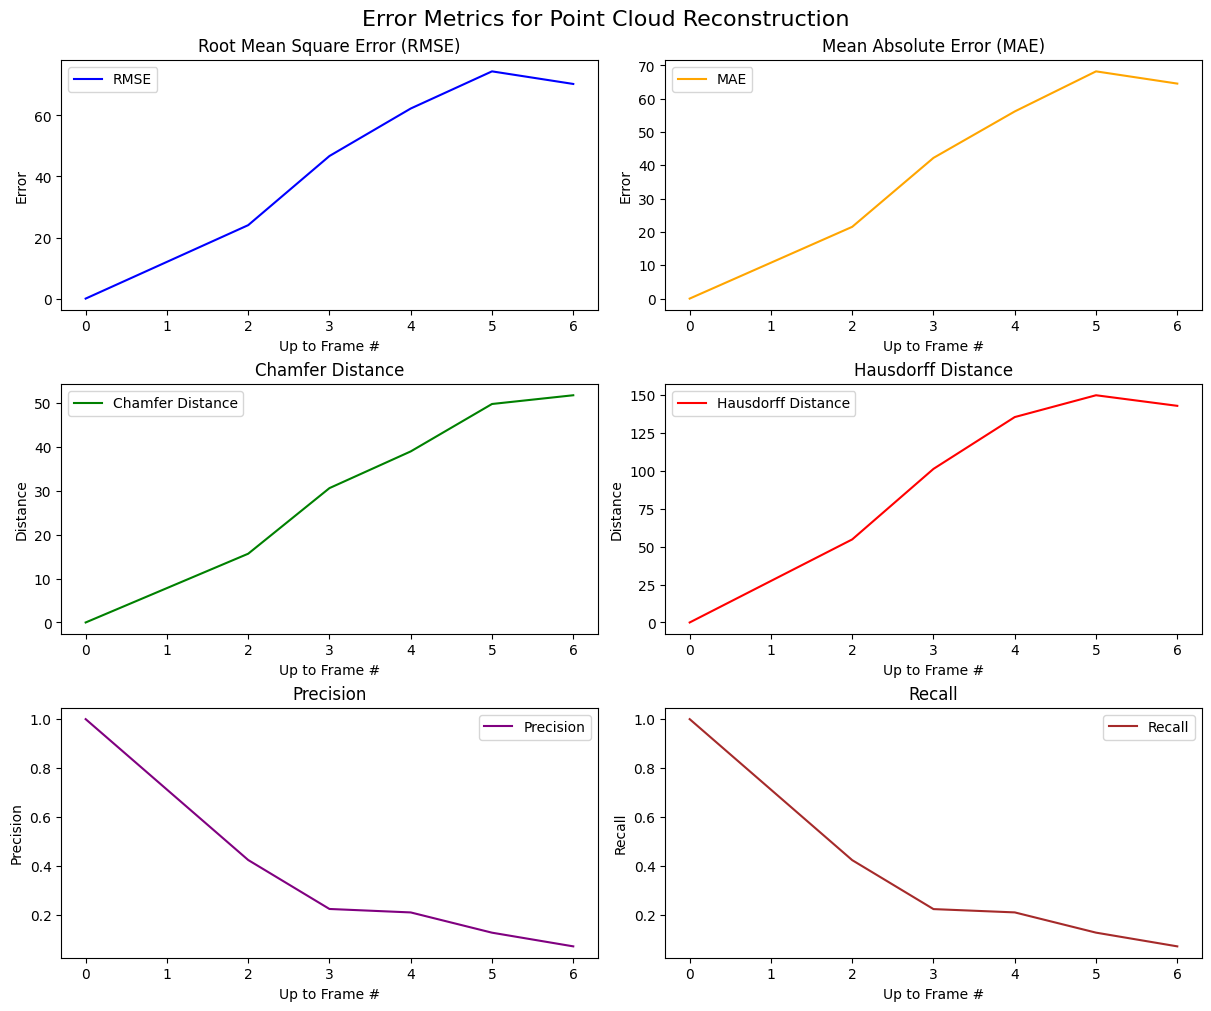

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

total_frames_in_dataset = get_total_frames(DATASET_PATH)

# Frame indices
x = np.concatenate(([0], np.arange(2, total_frames_in_dataset, EVERY)))[:len(metrics['rmse'])]

rmse_history = metrics["rmse"]
mae_history = metrics["mae"]
chamfer_history = metrics["chamfer"]
hausdorff_history = metrics["hausdorff"]
precision_history = metrics["precision"]
recall_history = metrics["recall"]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)

# Plot RMSE
axes[0, 0].plot(x, rmse_history, color="blue", label="RMSE")
axes[0, 0].set_title("Root Mean Square Error (RMSE)")
axes[0, 0].set_xlabel("Up to Frame #")
axes[0, 0].set_ylabel("Error")
axes[0, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0, 0].legend()

# Plot MAE
axes[0, 1].plot(x, mae_history, color="orange", label="MAE")
axes[0, 1].set_title("Mean Absolute Error (MAE)")
axes[0, 1].set_xlabel("Up to Frame #")
axes[0, 1].set_ylabel("Error")
axes[0, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[0, 1].legend()

# Plot Chamfer Distance
axes[1, 0].plot(x, chamfer_history, color="green", label="Chamfer Distance")
axes[1, 0].set_title("Chamfer Distance")
axes[1, 0].set_xlabel("Up to Frame #")
axes[1, 0].set_ylabel("Distance")
axes[1, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[1, 0].legend()

# Plot Hausdorff Distance
axes[1, 1].plot(x, hausdorff_history, color="red", label="Hausdorff Distance")
axes[1, 1].set_title("Hausdorff Distance")
axes[1, 1].set_xlabel("Up to Frame #")
axes[1, 1].set_ylabel("Distance")
axes[1, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[1, 1].legend()

# Plot Precision
axes[2, 0].plot(x, precision_history, color="purple", label="Precision")
axes[2, 0].set_title("Precision")
axes[2, 0].set_xlabel("Up to Frame #")
axes[2, 0].set_ylabel("Precision")
axes[2, 0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[2, 0].legend()

# Plot Recall
axes[2, 1].plot(x, recall_history, color="brown", label="Recall")
axes[2, 1].set_title("Recall")
axes[2, 1].set_xlabel("Up to Frame #")
axes[2, 1].set_ylabel("Recall")
axes[2, 1].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[2, 1].legend()

# Main title for the figure
fig.suptitle("Error Metrics for Point Cloud Reconstruction", fontsize=16)

# Show the plots
plt.show()


In [8]:
visualize_point_cloud(exp_point_cloud, rgb)

2024-12-09 02:19:52.016 python[60452:3121597] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-09 02:19:52.017 python[60452:3121597] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
visualize_point_cloud(exp_point_cloud_noicp, rgb_noicp)